In [99]:
import csv

import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42

# 各パス指定

In [100]:
dataset = 'model/keypoint_classifier/keypoint.csv'
# model_save_path = 'model/keypoint_classifier/keypoint_classifier.hdf5'
model_save_path = 'model/keypoint_classifier/keypoint_classifier.keras'

# 分類数設定

In [101]:
NUM_CLASSES = 6

# 学習データ読み込み

In [102]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 2) + 1)))

In [103]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [104]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

# モデル構築

In [105]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((21 * 2, )),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

In [106]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dropout_10 (Dropout)                 │ (None, 42)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 20)                  │             860 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_11 (Dropout)                 │ (None, 20)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 10)                  │             210 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 6)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,136 (4.44 KB)

 Trainable params: 1,136 (4.44 KB)

 Non-trainable params: 0 (0.00 B)

In [107]:
# モデルチェックポイントのコールバック
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False, save_best_only=True)
# 早期打ち切り用コールバック
# es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

In [108]:
# モデルコンパイル
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# モデル訓練

In [109]:
model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=128,
    validation_data=(X_test, y_test),
    # callbacks=[cp_callback, es_callback]
    callbacks=[cp_callback, es_callback] 
)

Epoch 1/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 4s 2s/step - accuracy: 0.0078 - loss: 2.4984
Epoch 1: val_loss improved from None to 2.19969, saving model to model/keypoint_classifier/keypoint_classifier.keras
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 158ms/step - accuracy: 0.0225 - loss: 2.4440 - val_accuracy: 0.0203 - val_loss: 2.1997
Epoch 2/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step - accuracy: 0.0391 - loss: 2.2933
Epoch 2: val_loss improved from 2.19969 to 2.06483, saving model to model/keypoint_classifier/keypoint_classifier.keras
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step - accuracy: 0.0315 - loss: 2.2776 - val_accuracy: 0.0203 - val_loss: 2.0648
Epoch 3/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step - accuracy: 0.0469 - loss: 2.2367
Epoch 3: val_loss improved from 2.06483 to 1.94524, saving model to model/keypoint_classifier/keypoint_classifier.keras
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - accuracy: 0.0360 - loss: 2.1498 - val_accuracy: 0.0203 - val_loss: 1.9452
Epoch 4/1000
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms

In [110]:
# モデル評価
val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=128)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.8919 - loss: 0.3261


In [111]:
# 保存したモデルのロード
model = tf.keras.models.load_model(model_save_path)
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [112]:
# 推論テスト
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
[9.4784606e-05 2.2048940e-05 3.4533918e-04 9.8314351e-01 5.0036793e-05
 1.6344327e-02]
3


# 混同行列

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


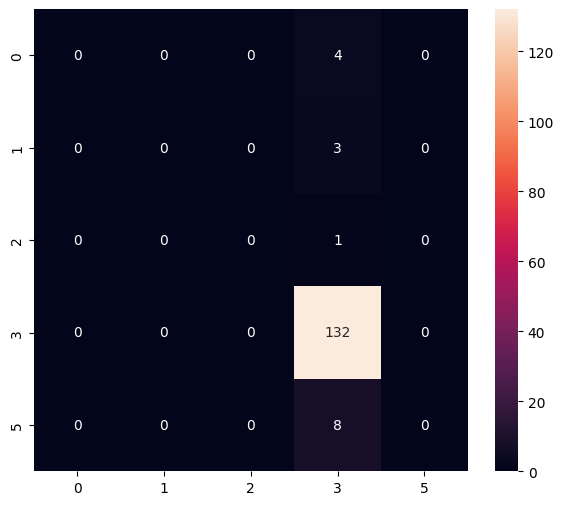

Classification Report
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.00      0.00      0.00         3
           2       0.00      0.00      0.00         1
           3       0.89      1.00      0.94       132
           5       0.00      0.00      0.00         8

    accuracy                           0.89       148
   macro avg       0.18      0.20      0.19       148
weighted avg       0.80      0.89      0.84       148



In [113]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        # print(classification_report(y_test, y_pred))
        print(classification_report(y_true, y_pred, zero_division=0))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

# Tensorflow-Lite用のモデルへ変換

In [114]:
# 推論専用のモデルとして保存
model_save_path = 'model/keypoint_classifier/keypoint_classifier.keras' 
model.save(model_save_path, include_optimizer=False)

In [115]:
# Model conversion (quantization)
tflite_save_path = "model/keypoint_classifier/keypoint_classifier.tflite"

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

# Correct file writing - FIXED 'ub' to 'wb'
with open(tflite_save_path, 'wb') as f:
    f.write(tflite_quantized_model)

INFO:tensorflow:Assets written to: C:\Users\MITCHL~1\AppData\Local\Temp\tmpv2mhn6p2\assets


INFO:tensorflow:Assets written to: C:\Users\MITCHL~1\AppData\Local\Temp\tmpv2mhn6p2\assets


Saved artifact at 'C:\Users\MITCHL~1\AppData\Local\Temp\tmpv2mhn6p2'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 42), dtype=tf.float32, name='input_layer_5')
Output Type:
  TensorSpec(shape=(None, 6), dtype=tf.float32, name=None)
Captures:
  2277862288720: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2277862286224: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2277862284688: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2277862282000: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2277862288144: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2277862288528: TensorSpec(shape=(), dtype=tf.resource, name=None)


# 推論テスト

In [116]:
# interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
# interpreter.allocate_tensors()

try:
    from tflite_runtime.interpreter import Interpreter
    interpreter = Interpreter(model_path=tflite_save_path)
except ImportError:
    import warnings
    warnings.filterwarnings('ignore', category=UserWarning)
    interpreter = tf.lite.Interpreter(model_path=tflite_save_path)

interpreter.allocate_tensors()

In [117]:
# 入出力テンソルを取得
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [118]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

In [119]:
%%time
# 推論実施
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

CPU times: total: 0 ns
Wall time: 0 ns


In [120]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))

[9.4784598e-05 2.2048938e-05 3.4533904e-04 9.8314351e-01 5.0036793e-05
 1.6344335e-02]
3
